 _Lambda School Data Science Unit 2_
 
 # Classification & Validation Sprint Challenge

Follow the instructions for each numbered part to earn a score of 2. See the bottom of the notebook for a list of ways you can earn a score of 3.

#### For this Sprint Challenge, you'll predict whether a person's income exceeds $50k/yr, based on census data.

You can read more about the Adult Census Income dataset at the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/adult

#### Run this cell to load the data:

In [ ]:
import pandas as pd

columns = ['age', 
           'workclass', 
           'fnlwgt', 
           'education', 
           'education-num', 
           'marital-status', 
           'occupation', 
           'relationship', 
           'race', 
           'sex', 
           'capital-gain', 
           'capital-loss', 
           'hours-per-week', 
           'native-country', 
           'income']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 header=None, names=columns)

df['income'] = df['income'].str.strip()

## Part 1 — Begin with baselines

Split the data into an **X matrix** (all the features) and **y vector** (the target).

(You _don't_ need to split the data into train and test sets here. You'll be asked to do that at the _end_ of Part 1.)

In [3]:
X = df.drop(columns='income')
y = df['income']

What **accuracy score** would you get here with a **"majority class baseline"?** 
 
(You can answer this question either with a scikit-learn function or with a pandas function.)

In [24]:
df['income'].value_counts(normalize=True)


<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [ ]:

majority_class = df['income'].mode()[0]
y_pred = [majority_class] * len(y)

from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

What **ROC AUC score** would you get here with a **majority class baseline?**

(You can answer this question either with a scikit-learn function or with no code, just your understanding of ROC AUC.)

0.5

In this Sprint Challenge, you will use **"Cross-Validation with Independent Test Set"** for your model validaton method.

First, **split the data into `X_train, X_test, y_train, y_test`**. You can include 80% of the data in the train set, and hold out 20% for the test set.

In [ ]:
from sklearn.model_selection import train_test_split

rand_seed = 314

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_seed, stratify=y)

## Part 2 — Modeling with Logistic Regression!

- You may do exploratory data analysis and visualization, but it is not required.
- You may **use all the features, or select any features** of your choice, as long as you select at least one numeric feature and one categorical feature.
- **Scale your numeric features**, using any scikit-learn [Scaler](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) of your choice.
- **Encode your categorical features**. You may use any encoding (One-Hot, Ordinal, etc) and any library (category_encoders, scikit-learn, pandas, etc) of your choice.
- You may choose to use a pipeline, but it is not required.
- Use a **Logistic Regression** model.
- Use scikit-learn's [**cross_val_score**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function. For [scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules), use **accuracy**.
- **Print your model's cross-validation accuracy score.**

In [29]:
X.describe(include='number')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
X.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [ ]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score




# ok, quick and dirty logistic regression to establish a baseline

features = df.drop(columns='income').columns.tolist()
target = 'income' #df['income'] == '>50K'

X = df[features]
y = df[target] == '>50K'

# pipeline for preprocessing
preprocessor = make_pipeline(ce.OrdinalEncoder(), 
                            SimpleImputer(),
                            MinMaxScaler()
                            )

# preprocess feature data
X = preprocessor.fit_transform(X)
X = pd.DataFrame(X, columns = features)

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=rand_seed)

scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10,
                       n_jobs=-1, verbose = True)
model.fit(X_train,y_train)
test_score = model.score(X_test, y_test)

print('Cross Val Accuracy Scores: ', scores)
print('Mean CV Accuracy Score: ', scores.mean())
print('Test Accuracy Score: ', test_score)


## Part 3 — Modeling with Tree Ensembles!

Part 3 is the same as Part 2, except this time, use a **Random Forest** or **Gradient Boosting** classifier. You may use scikit-learn, xgboost, or any other library. Then, print your model's cross-validation accuracy score.

In [45]:
from sklearn.ensemble import RandomForestClassifier

# again, a quick and dirty one

features = df.drop(columns='income').columns.tolist()
target = 'income' #df['income'] == '>50K'

X = df[features]
y = df[target] == '>50K'

# pipeline for preprocessing
preprocessor = make_pipeline(ce.OrdinalEncoder(), 
                            SimpleImputer(),
                            MinMaxScaler()
                            )

# preprocess feature data
X = preprocessor.fit_transform(X)
X = pd.DataFrame(X, columns = features)

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# define model
model = RandomForestClassifier(max_depth=3, n_estimators=6, random_state=rand_seed)

scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10,
               n_jobs=-1, verbose = False)

model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print('Cross Val accuracy Scores: ', scores)
print('Mean CV accuracy Score: ', scores.mean())
print('Test accuracy Score: ', test_score)

Cross Val accuracy Scores:  [0.80237913 0.79662318 0.80621642 0.80614203 0.80422265 0.80645161
 0.80261137 0.79761905 0.79646697 0.80645161]
Mean CV accuracy Score:  0.8025184023757552
Test accuracy Score:  0.8050053738676494


## Part 4 — Calculate classification metrics from a confusion matrix

Suppose this is the confusion matrix for your binary classification model:

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

In [52]:
true_positive = 36
true_negative = 85
false_positive = 58
false_negative = 8

pred_positive = true_positive + false_positive
pred_negative = true_negative + false_negative

actual_positive = false_negative + true_positive

Calculate accuracy

In [53]:
accuracy = (true_positive + true_negative) / (pred_negative + pred_positive)

print('Accuracy ', accuracy)

Accuracy  0.6470588235294118


Calculate precision

In [54]:
precision = true_positive / pred_positive

print('Precision ', precision)

Precision  0.3829787234042553


Calculate recall

In [56]:
recall = true_positive / actual_positive

print('Recall ', recall)

Recall  0.8181818181818182


## BONUS — How you can earn a score of 3

### Part 1
Do feature engineering, to try improving your cross-validation score.

### Part 2
Experiment with feature selection, preprocessing, categorical encoding, and hyperparameter optimization, to try improving your cross-validation score.

### Part 3
Which model had the best cross-validation score? Refit this model on the train set and do a final evaluation on the held out test set — what is the test score? 

### Part 4
Calculate F1 score and False Positive Rate. 

## Part 1
Do feature engineering, to try improving your cross-validation score.

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)
y_pred_proba = tree.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_proba)

0.8195211097583623

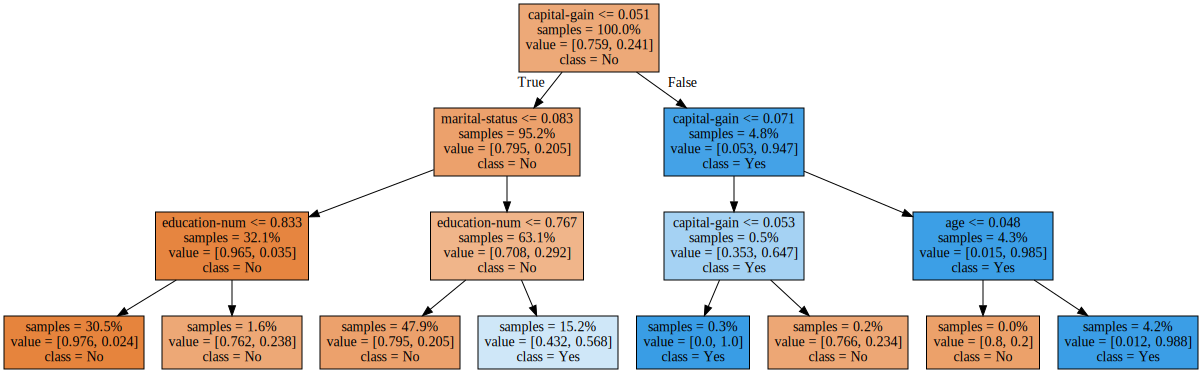

In [67]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns, 
                           class_names=['No', 'Yes'], filled=True, impurity=False, proportion=True)

graphviz.Source(dot_data)

The above decision stump shows that marital-status and capital gains are important features, I'm going to dig into them

In [68]:
df['marital-status'].value_counts(normalize='True')
# reading the literature makes me believe I can combine civ spouse, AF spouse, and spouse absent

X['marital-status'] = df['marital-status'].map({'Married-civ-spouse': 'Married',
                                                'Married-AF-spouse': 'Married',
                                               'Married-spouse-absent': 'Married'})

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

In [78]:
X['cap-gain-binned'] = pd.cut(df['capital-gain'], 10)
# I'll try binning this 

In [59]:
df['native-country'].value_counts(normalize='True')
# this is so broad, I'd like to map to regions

 United-States                 0.895857
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


In [71]:
X['native-country'] = df['native-country'].map({' United-States' : 'NA',
 ' Cuba':'SA',
 ' Jamaica': 'SA',
 ' India':'A',
 ' ?':'Unknown',
 ' Mexico':'SA',
 ' South':'SA',
 ' Puerto-Rico':'SA',
 ' Honduras':'SA',
 ' England':'E',
 ' Canada':'NA',
 ' Germany':'E',
 ' Iran':'ME',
 ' Philippines':'SEA',
 ' Italy':"E",
 ' Poland':'EE',
 ' Columbia':'SA',
 ' Cambodia':'SEA',
 ' Thailand':'SEA',
 ' Ecuador':'SA',
 ' Laos':'SEA',
 ' Taiwan':'A',
 ' Haiti':'SA',
 ' Portugal':'E',
 ' Dominican-Republic':'SA',
 ' El-Salvador':'SA',
 ' France':'E',
 ' Guatemala':'SA',
 ' China':'A',
 ' Japan':'A',
 ' Yugoslavia':'EE',
 ' Peru':'SA',
 ' Outlying-US(Guam-USVI-etc)':'SEA',
 ' Scotland':'E',
 ' Trinadad&Tobago':'SA',
 ' Greece':'E',
 ' Nicaragua':'SA',
 ' Vietnam':'SEA',
 ' Hong':'A',
 ' Ireland':'E',
 ' Hungary':'EE',
 ' Holand-Netherlands':'E'})

### Part 2
Experiment with feature selection, preprocessing, categorical encoding, and hyperparameter optimization, to try improving your cross-validation score.

In [112]:
# I'm going to attempt to run several regressions to optimize parameters
from xgboost import XGBClassifier


# reload data
columns = ['age', 
           'workclass', 
           'fnlwgt', 
           'education', 
           'education-num', 
           'marital-status', 
           'occupation', 
           'relationship', 
           'race', 
           'sex', 
           'capital-gain', 
           'capital-loss', 
           'hours-per-week', 
           'native-country', 
           'income']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 header=None, names=columns)

df['income'] = df['income'].str.strip()

# again, a quick and dirty one

features = df.drop(columns='income').columns.tolist()
target = 'income' #df['income'] == '>50K'

X = df[features]
y = df[target] == '>50K'

# add aditional features

# X['cap-gain-binned'] = pd.cut(df['capital-gain'], 5)
# X['cap-gain-binned'] = pd.Categorical(X['cap-gain-binned'])

X['marital-status'] = df['marital-status'].map({'Married-civ-spouse': 'Married',
                                                'Married-AF-spouse': 'Married',
                                               'Married-spouse-absent': 'Married'})

X['native-country'] = df['native-country'].map({' United-States' : 'NA',
 ' Cuba':'SA',
 ' Jamaica': 'SA',
 ' India':'A',
 ' ?':'Unknown',
 ' Mexico':'SA',
 ' South':'SA',
 ' Puerto-Rico':'SA',
 ' Honduras':'SA',
 ' England':'E',
 ' Canada':'NA',
 ' Germany':'E',
 ' Iran':'ME',
 ' Philippines':'SEA',
 ' Italy':"E",
 ' Poland':'EE',
 ' Columbia':'SA',
 ' Cambodia':'SEA',
 ' Thailand':'SEA',
 ' Ecuador':'SA',
 ' Laos':'SEA',
 ' Taiwan':'A',
 ' Haiti':'SA',
 ' Portugal':'E',
 ' Dominican-Republic':'SA',
 ' El-Salvador':'SA',
 ' France':'E',
 ' Guatemala':'SA',
 ' China':'A',
 ' Japan':'A',
 ' Yugoslavia':'EE',
 ' Peru':'SA',
 ' Outlying-US(Guam-USVI-etc)':'SEA',
 ' Scotland':'E',
 ' Trinadad&Tobago':'SA',
 ' Greece':'E',
 ' Nicaragua':'SA',
 ' Vietnam':'SEA',
 ' Hong':'A',
 ' Ireland':'E',
 ' Hungary':'EE',
 ' Holand-Netherlands':'E'})

/home/nedderlander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nedderlander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [113]:
# pipeline for preprocessing
preprocessor = make_pipeline(ce.OrdinalEncoder(), 
                            SimpleImputer(),
                            MinMaxScaler()
                            )

# preprocess feature data
X = preprocessor.fit_transform(X)
X = pd.DataFrame(X, columns = features)

In [124]:
# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# parameters to fine tune model
max_depth = 6

n_estimators = 5

weights = [{0: 1, 1: 1}, #(equivalent to None)
{0: 1, 1: 2},
{0: 1, 1: 10}, #(roughly equivalent to 'balanced' for this dataset)
{0: 1, 1: 100},
{0: 1, 1: 10000}]



# dataframe to hold all values
results = pd.DataFrame(columns = ['Model', 'CV Mean ROC_AUC Score', 
            'Test ROC_AUC Score', 'max_depth', 'n_estimators', 'class_weight'])
for weight in weights:
    for depth in range(1, max_depth):
        for n in range(1, n_estimators):
        
            models = [LogisticRegression(solver='lbfgs', max_iter=100, class_weight=weight,
                                 random_state=rand_seed),
              DecisionTreeClassifier(max_depth=depth, class_weight=weight,
                                     random_state=rand_seed),
              RandomForestClassifier(max_depth=depth, class_weight=weight,
                                     random_state=rand_seed),
              XGBClassifier(max_depth=depth, n_estimators = n,
                            n_jobs=-1, random_state=rand_seed)
             ]
            
            for model in models:
                # define model
                scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=10,
                           n_jobs=-1, verbose = False)
                model.fit(X_train, y_train)
                test_score = model.score(X_test, y_test)

                # append to dataframe
                results = results.append({'Model': model, 'CV Mean ROC_AUC Score': scores.mean(), 
                    'Test ROC_AUC Score': test_score, 'max_depth':depth, 'n_estimators':n, 
                                          'class_weight':weight}, 
                                    ignore_index=True)



/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/a

/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/a

/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nedderlander/a

In [125]:
results.sort_values(by='Test ROC_AUC Score', ascending=False)

# results['Model'].nunique()

,Model,CV Mean ROC_AUC Score,Test ROC_AUC Score,max_depth,n_estimators,class_weight
391,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.883146,0.854138,5,2,"{0: 1, 1: 10000}"
151,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.883146,0.854138,5,2,"{0: 1, 1: 2}"
71,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.883146,0.854138,5,2,"{0: 1, 1: 1}"
231,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.883146,0.854138,5,2,"{0: 1, 1: 10}"
311,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.883146,0.854138,5,2,"{0: 1, 1: 100}"
399,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.891031,0.852142,5,4,"{0: 1, 1: 10000}"
319,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.891031,0.852142,5,4,"{0: 1, 1: 100}"
79,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.891031,0.852142,5,4,"{0: 1, 1: 1}"
239,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.891031,0.852142,5,4,"{0: 1, 1: 10}"
159,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.891031,0.852142,5,4,"{0: 1, 1: 2}"


### Part 3
Which model had the best cross-validation score? Refit this model on the train set and do a final evaluation on the held out test set — what is the test score? 

In [126]:
results.loc[231]

Model                    XGBClassifier(base_score=0.5, booster='gbtree'...
CV Mean ROC_AUC Score                                             0.883146
Test ROC_AUC Score                                                0.854138
max_depth                                                                5
n_estimators                                                             2
class_weight                                                 {0: 1, 1: 10}
Name: 231, dtype: object

XGB with depth 5, 2 estimators seems to have done very well, I'm going to re-calibrate this algorithm with more estimators:

In [13]:
X.memory_usage(index = True) 

Index                 80
age               260488
workclass         260488
fnlwgt            260488
education         260488
education-num     260488
marital-status    260488
occupation        260488
relationship      260488
race              260488
sex               260488
capital-gain      260488
capital-loss      260488
hours-per-week    260488
native-country    260488
dtype: int64

In [9]:
from numba import jit
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pandas as pd
from numba import jit
from xgboost import XGBClassifier

# to fix kernel restart
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# reload data
columns = ['age', 
           'workclass', 
           'fnlwgt', 
           'education', 
           'education-num', 
           'marital-status', 
           'occupation', 
           'relationship', 
           'race', 
           'sex', 
           'capital-gain', 
           'capital-loss', 
           'hours-per-week', 
           'native-country', 
           'income']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 header=None, names=columns)

df['income'] = df['income'].str.strip()

# again, a quick and dirty one

features = df.drop(columns='income').columns.tolist()
target = 'income' #df['income'] == '>50K'

X = df[features]
y = df[target] == '>50K'

# add aditional features

# X['cap-gain-binned'] = pd.cut(df['capital-gain'], 5)
# X['cap-gain-binned'] = pd.Categorical(X['cap-gain-binned'])

X['marital-status'] = df['marital-status'].map({'Married-civ-spouse': 'Married',
                                                'Married-AF-spouse': 'Married',
                                               'Married-spouse-absent': 'Married'})

X['native-country'] = df['native-country'].map({' United-States' : 'NA',
 ' Cuba':'SA',
 ' Jamaica': 'SA',
 ' India':'A',
 ' ?':'Unknown',
 ' Mexico':'SA',
 ' South':'SA',
 ' Puerto-Rico':'SA',
 ' Honduras':'SA',
 ' England':'E',
 ' Canada':'NA',
 ' Germany':'E',
 ' Iran':'ME',
 ' Philippines':'SEA',
 ' Italy':"E",
 ' Poland':'EE',
 ' Columbia':'SA',
 ' Cambodia':'SEA',
 ' Thailand':'SEA',
 ' Ecuador':'SA',
 ' Laos':'SEA',
 ' Taiwan':'A',
 ' Haiti':'SA',
 ' Portugal':'E',
 ' Dominican-Republic':'SA',
 ' El-Salvador':'SA',
 ' France':'E',
 ' Guatemala':'SA',
 ' China':'A',
 ' Japan':'A',
 ' Yugoslavia':'EE',
 ' Peru':'SA',
 ' Outlying-US(Guam-USVI-etc)':'SEA',
 ' Scotland':'E',
 ' Trinadad&Tobago':'SA',
 ' Greece':'E',
 ' Nicaragua':'SA',
 ' Vietnam':'SEA',
 ' Hong':'A',
 ' Ireland':'E',
 ' Hungary':'EE',
 ' Holand-Netherlands':'E'})

# pipeline for preprocessing
preprocessor = make_pipeline(ce.OrdinalEncoder(), 
                            SimpleImputer(),
                            MinMaxScaler()
                            )

# preprocess feature data
X = preprocessor.fit_transform(X)
X = pd.DataFrame(X, columns = features)

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# parameters to fine tune model
max_depth = [3, 4, 5, 6]

n_estimators = [2, 4, 10, 20, 100]

weights = [{0: 1, 1: 1}, #(equivalent to None)
# {0: 1, 1: 2},
{0: 1, 1: 10}, #(roughly equivalent to 'balanced' for this dataset)
# {0: 1, 1: 100},
# {0: 1, 1: 10000}
          ]
rand_seed = 42



# @jit(nopython=True)
def test_XG(weights, max_depth, n_estimators):
    # columns to hold all values
    cols = ['Model', 'CV Mean ROC_AUC Score', 
            'Test ROC_AUC Score', 'max_depth', 'n_estimators', 'class_weight']
    results = []
    for weight in weights:
        for depth in max_depth:
            for n in n_estimators:
                
                params = {"n_estimators":n, "class_weight":weight, "max_depth":depth,
                         # 'tree_method':'gpu_hist'
                         }

                models = [#LogisticRegression(solver='lbfgs', max_iter=100, 
                    #class_weight=weight,
                           #          random_state=rand_seed),
                  #DecisionTreeClassifier(max_depth=depth, class_weight=weight,
                   #                      random_state=rand_seed),
                  #RandomForestClassifier(max_depth=depth, class_weight=weight,
                   #                      random_state=rand_seed),
                  XGBClassifier(**params)]

                for model in models:
                    # define model
                    scores = cross_val_score(model, X_train, y_train, 
                    scoring='roc_auc', cv=3, verbose = True, n_jobs=-1, 
                                            )
                    model.fit(X_train, y_train)
                    test_score = model.score(X_test, y_test)
                    
                    row = [model, scores.mean(), test_score, depth, n, weight]
                    results.append(row)

    return pd.DataFrame(data = results, columns=cols)

/home/nedderlander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nedderlander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
results = test_XG(weights, max_depth, n_estimators)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3

In [14]:
results.sort_values(by='Test ROC_AUC Score', ascending=False)[:5]
# looks like equal weighting with a max depth of 5/6 gives solid results, 
# I will iterate again

,Model,CV Mean ROC_AUC Score,Test ROC_AUC Score,max_depth,n_estimators,class_weight
39,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.924348,0.874251,6,100,"{0: 1, 1: 10}"
19,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.924348,0.874251,6,100,"{0: 1, 1: 1}"
34,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.923453,0.871948,5,100,"{0: 1, 1: 10}"
14,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.923453,0.871948,5,100,"{0: 1, 1: 1}"
29,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.922233,0.871334,4,100,"{0: 1, 1: 10}"


In [16]:
# parameters to fine tune model
max_depth = [4, 5, 6, 7]

n_estimators = [90, 100, 200]

weights = [{0: 1, 1: 1}, #(equivalent to None)
{0: 1, 1: 2},
{0: 1, 1: 10}, #(roughly equivalent to 'balanced' for this dataset)
{0: 1, 1: 100},
{0: 1, 1: 10000}]

new_results = test_XG(weights, max_depth, n_estimators)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished


In [17]:
new_results.sort_values(by='Test ROC_AUC Score', ascending=False)

,Model,CV Mean ROC_AUC Score,Test ROC_AUC Score,max_depth,n_estimators,class_weight
53,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.925490,0.877476,5,200,"{0: 1, 1: 10000}"
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.925490,0.877476,5,200,"{0: 1, 1: 1}"
29,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.925490,0.877476,5,200,"{0: 1, 1: 10}"
17,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.925490,0.877476,5,200,"{0: 1, 1: 2}"
41,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.925490,0.877476,5,200,"{0: 1, 1: 100}"
46,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.924228,0.875326,7,100,"{0: 1, 1: 100}"
34,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.924228,0.875326,7,100,"{0: 1, 1: 10}"
58,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.924228,0.875326,7,100,"{0: 1, 1: 10000}"
10,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.924228,0.875326,7,100,"{0: 1, 1: 1}"
22,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.924228,0.875326,7,100,"{0: 1, 1: 2}"


Looks like classweight doesn't matter because it fluxuates widly witthin the top model parameters, my wining model params are:
params = {"n_estimators":200, "class_weight":None, "max_depth":5
XGBClassifier(**params)


### Part 4
Calculate F1 score and False Positive Rate. 

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict


params = {"n_estimators":200, "class_weight":None, "max_depth":5}

model = XGBClassifier(**params)

y_pred_proba = cross_val_predict(model, X_test, y_test, cv=3, n_jobs=-1, 
                                 method='predict_proba')[:,1]

threshold = 0.5

y_pred = y_pred_proba >= threshold

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

# FPR = FP / (FP + TN)

FPR = 301 / (301+4644)

print('False Positive Rate: ', FPR)

              precision    recall  f1-score   support

       False       0.89      0.94      0.91      4945
        True       0.77      0.63      0.69      1568

   micro avg       0.86      0.86      0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513

False Positive Rate:  0.06086956521739131


Below is an attempt to use numba to cast my regression optimization function to gpu, didn't work, will figure out why eventually


# Jit Optomized Algorithm

In [154]:
from numba import jit
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


# reload data
columns = ['age', 
           'workclass', 
           'fnlwgt', 
           'education', 
           'education-num', 
           'marital-status', 
           'occupation', 
           'relationship', 
           'race', 
           'sex', 
           'capital-gain', 
           'capital-loss', 
           'hours-per-week', 
           'native-country', 
           'income']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 header=None, names=columns)

df['income'] = df['income'].str.strip()

# again, a quick and dirty one

features = df.drop(columns='income').columns.tolist()
target = 'income' #df['income'] == '>50K'

X = df[features]
y = df[target] == '>50K'

# add aditional features

# X['cap-gain-binned'] = pd.cut(df['capital-gain'], 5)
# X['cap-gain-binned'] = pd.Categorical(X['cap-gain-binned'])

X['marital-status'] = df['marital-status'].map({'Married-civ-spouse': 'Married',
                                                'Married-AF-spouse': 'Married',
                                               'Married-spouse-absent': 'Married'})

X['native-country'] = df['native-country'].map({' United-States' : 'NA',
 ' Cuba':'SA',
 ' Jamaica': 'SA',
 ' India':'A',
 ' ?':'Unknown',
 ' Mexico':'SA',
 ' South':'SA',
 ' Puerto-Rico':'SA',
 ' Honduras':'SA',
 ' England':'E',
 ' Canada':'NA',
 ' Germany':'E',
 ' Iran':'ME',
 ' Philippines':'SEA',
 ' Italy':"E",
 ' Poland':'EE',
 ' Columbia':'SA',
 ' Cambodia':'SEA',
 ' Thailand':'SEA',
 ' Ecuador':'SA',
 ' Laos':'SEA',
 ' Taiwan':'A',
 ' Haiti':'SA',
 ' Portugal':'E',
 ' Dominican-Republic':'SA',
 ' El-Salvador':'SA',
 ' France':'E',
 ' Guatemala':'SA',
 ' China':'A',
 ' Japan':'A',
 ' Yugoslavia':'EE',
 ' Peru':'SA',
 ' Outlying-US(Guam-USVI-etc)':'SEA',
 ' Scotland':'E',
 ' Trinadad&Tobago':'SA',
 ' Greece':'E',
 ' Nicaragua':'SA',
 ' Vietnam':'SEA',
 ' Hong':'A',
 ' Ireland':'E',
 ' Hungary':'EE',
 ' Holand-Netherlands':'E'})

# pipeline for preprocessing
preprocessor = make_pipeline(ce.OrdinalEncoder(), 
                            SimpleImputer(),
                            MinMaxScaler()
                            )

# preprocess feature data
X = preprocessor.fit_transform(X)
X = pd.DataFrame(X, columns = features)

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# parameters to fine tune model
max_depth = [1, 2, 3, 4, 5, 6]

n_estimators = [10, 40, 100, 200, 300]

weights = [{0: 1, 1: 1}, #(equivalent to None)
# {0: 1, 1: 2},
{0: 1, 1: 10}, #(roughly equivalent to 'balanced' for this dataset)
{0: 1, 1: 100},
# {0: 1, 1: 10000}
          ]



# dataframe to hold all values
results = pd.DataFrame(columns = ['Model', 'CV Mean ROC_AUC Score', 
            'Test ROC_AUC Score', 'max_depth', 'n_estimators', 'class_weight'])

/home/nedderlander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nedderlander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [155]:
def slow_XGB_opt(weights, max_depth, n_estimators):
    # dataframe to hold all values
    results = pd.DataFrame(columns = ['Model', 'CV Mean ROC_AUC Score', 
            'Test ROC_AUC Score', 'max_depth', 'n_estimators', 'class_weight'])

    for weight in weights:
        for depth in max_depth:
            for n in n_estimators:

                models = [#LogisticRegression(solver='lbfgs', max_iter=100, class_weight=weight,
                           #          random_state=rand_seed),
                  #DecisionTreeClassifier(max_depth=depth, class_weight=weight,
                   #                      random_state=rand_seed),
                  #RandomForestClassifier(max_depth=depth, class_weight=weight,
                   #                      random_state=rand_seed),
                  XGBClassifier(max_depth=depth, n_estimators = n,
                                n_jobs=-1, random_state=rand_seed)
                 ]

                for model in models:
                    # define model
                    scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5,
                               n_jobs=-1, verbose = True)
                    model.fit(X_train, y_train)
                    test_score = model.score(X_test, y_test)

                    # append to dataframe
                    results = results.append({'Model': model, 'CV Mean ROC_AUC Score': scores.mean(), 
                        'Test ROC_AUC Score': test_score, 'max_depth':depth, 'n_estimators':n, 
                                              'class_weight':weight}, 
                                        ignore_index=True)
    return results

In [158]:
@jit(nopython=False)
def fast_XGB_opt(weights, max_depth, n_estimators):
    # dataframe to hold all values
    results = pd.DataFrame(columns = ['Model', 'CV Mean ROC_AUC Score', 
            'Test ROC_AUC Score', 'max_depth', 'n_estimators', 'class_weight'])

    for weight in weights:
        for depth in max_depth:
            for n in n_estimators:

                models = [#LogisticRegression(solver='lbfgs', max_iter=100, class_weight=weight,
                           #          random_state=rand_seed),
                  #DecisionTreeClassifier(max_depth=depth, class_weight=weight,
                   #                      random_state=rand_seed),
                  #RandomForestClassifier(max_depth=depth, class_weight=weight,
                   #                      random_state=rand_seed),
                  XGBClassifier(max_depth=depth, n_estimators = n,
                                n_jobs=-1, tree_method='gpu_hist', random_state=rand_seed)
                 ]

                for model in models:
                    # define model
                    scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5,
                               n_jobs=-1, verbose = True)
                    model.fit(X_train, y_train)
                    test_score = model.score(X_test, y_test)

                    # append to dataframe
                    results = results.append({'Model': model, 'CV Mean ROC_AUC Score': scores.mean(), 
                        'Test ROC_AUC Score': test_score, 'max_depth':depth, 'n_estimators':n, 
                                              'class_weight':weight}, 
                                        ignore_index=True)
    return results

In [159]:
results = fast_XGB_opt(weights, max_depth, n_estimators)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6)}

In [149]:
results.sort_values(by='Test ROC_AUC Score', ascending=False)

,Model,CV Mean ROC_AUC Score,Test ROC_AUC Score,max_depth,n_estimators,class_weight
